# Loading Necessary Libraries

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk

# Initial Data Analysis and Data Loading

In [11]:
# Data Loading
fake_df = pd.read_csv("/kaggle/input/fake-news-detection/fake.csv")
true_df = pd.read_csv("/kaggle/input/fake-news-detection/true.csv")

In [12]:
# Fake News Data Sample
print("Fake News Data:")
fake_df.head()

Fake News Data:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [13]:
# True News Data Sample
print("\nTrue News Data:")
true_df.head()


True News Data:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [14]:
# Check for missing values
print("\nMissing Values in Fake News Data:")
print(fake_df.isnull().sum())
print("\nMissing Values in True News Data:")
print(true_df.isnull().sum())


Missing Values in Fake News Data:
title      0
text       0
subject    0
date       0
dtype: int64

Missing Values in True News Data:
title      0
text       0
subject    0
date       0
dtype: int64


In [15]:
# Check for Fake News Data
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [16]:
# Check for True News Data
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


# Data Cleaning

In [17]:
import string
from nltk.corpus import stopwords

# Function to remove punctuation
def remove_punc(text):
    new_text = [x for x in text if x not in string.punctuation]
    new_text = ''.join(new_text)
    return new_text

# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_words= ' '.join(filtered_words)
    return filtered_words

# Define the DataFrames
data_dfs = [true_df, fake_df]

# Iterate through each DataFrame
for data_df in data_dfs:
    # Remove punctuation
    data_df['text'] = data_df['text'].apply(remove_punc)
    # Remove stopwords
    data_df['text'] = data_df['text'].apply(remove_stopwords)

# Print the first few rows of the cleaned DataFrames
print("True DataFrame:")
print(true_df.head())

print("\nFake DataFrame:")
print(fake_df.head())


True DataFrame:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON Reuters head conservative Republica...  politicsNews   
1  WASHINGTON Reuters Transgender people allowed ...  politicsNews   
2  WASHINGTON Reuters special counsel investigati...  politicsNews   
3  WASHINGTON Reuters Trump campaign adviser Geor...  politicsNews   
4  SEATTLEWASHINGTON Reuters President Donald Tru...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   

Fake DataFrame:
                                               title  \
0   Donal

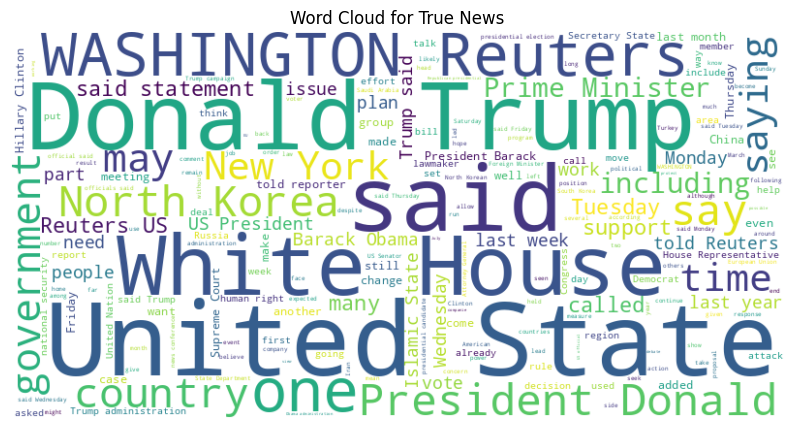

In [19]:
from wordcloud import WordCloud

# Word cloud for true news
true_text = ' '.join(true_df['text'])
wordcloud_true = WordCloud(width=800, height=400, background_color ='white').generate(true_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Word Cloud for True News')
plt.axis('off')
plt.show()

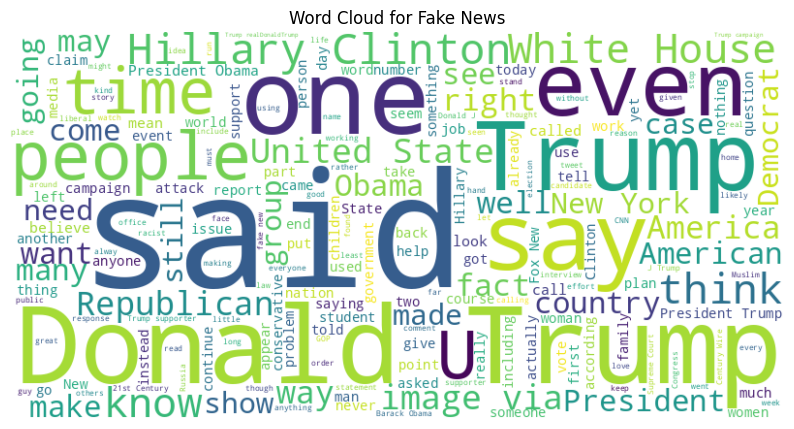

In [20]:
# Word cloud for fake news
fake_text = ' '.join(fake_df['text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color ='white').generate(fake_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()

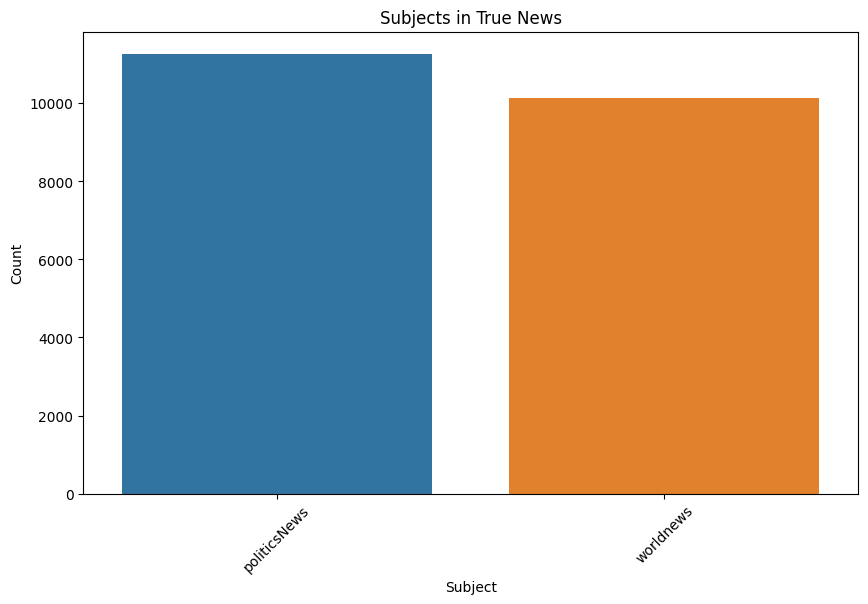

In [21]:
# Bar chart for subjects in true news
plt.figure(figsize=(10, 6))
sns.countplot(x='subject', data=true_df)
plt.title('Subjects in True News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

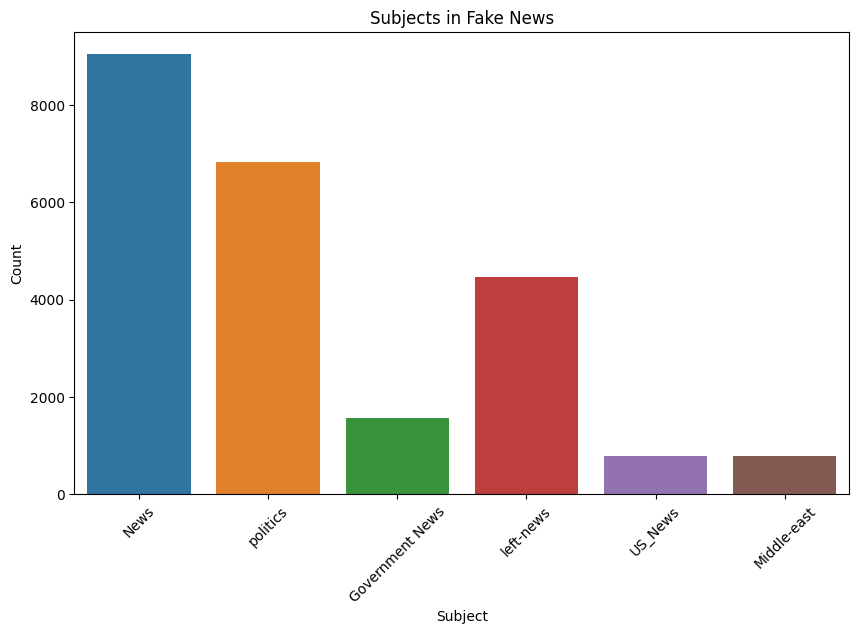

In [22]:
# Bar chart for subjects in fake news
plt.figure(figsize=(10, 6))
sns.countplot(x='subject', data=fake_df)
plt.title('Subjects in Fake News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [25]:
# Dropping date
true_df.drop('date', axis=1, inplace=True)
fake_df.drop('date', axis=1, inplace=True)


In [26]:
# Dropping Subject
true_df.drop('subject', axis=1, inplace=True)
fake_df.drop('subject', axis=1, inplace=True)

In [31]:
# Dropping title
true_df.drop('title', axis=1, inplace=True)
fake_df.drop('title', axis=1, inplace=True)

In [27]:
# Create a new column 'target' to indicate whether the news is true or fake:
true_df['target'] = 1
fake_df['target'] = 0

In [32]:
# Concatenate both DataFrames
df = pd.concat([true_df, fake_df], ignore_index=True)

In [34]:
# Reshuffle the rows randomly
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [35]:
df

,text,target
0,Donald Trump White House chaos trying cover Ru...,0
1,Donald Trump presumptive GOP nominee time reme...,0
2,Mike Pence huge homophobe supports exgay conve...,0
3,SAN FRANCISCO Reuters California Attorney Gene...,1
4,Twisted reasoning comes Pelosi days especially...,0
...,...,...
44893,ABUJA Reuters United States formally agreed se...,1
44894,Tune Alternate Current Radio Network ACR anoth...,0
44895,convinced Freedom Religion group atheists get ...,0
44896,WASHINGTON Reuters Republican tax plan unveile...,1


In [36]:
y = df['target']
X = df['text']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Step 1: Tokenization (Convert text data into numerical features)
count_vectorizer = CountVectorizer()  
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# Step 2: TF-IDF Transformation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


In [42]:
import pickle

# Export CountVectorizer as pickle object
with open('count_vectorizer.pkl', 'wb') as file:
    pickle.dump(count_vectorizer, file)

# Export TfidfTransformer as pickle object
with open('tfidf_transformer.pkl', 'wb') as file:
    pickle.dump(tfidf_transformer, file)


In [40]:
# Step 3: Training and evaluating classifiers
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression()
}

accuracy_scores = {}

for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train_tfidf, y_train)
    
    # Predict the labels
    y_pred = classifier.predict(X_test_tfidf)
    
    # Evaluate performance
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy_scores[name]:.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("=" * 50)

Classifier: Multinomial Naive Bayes
Accuracy: 0.9355
F1 Score: 0.9332
Precision: 0.9253
Recall: 0.9412
Confusion Matrix:
[[6532  490]
 [ 379 6069]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7022
           1       0.93      0.94      0.93      6448

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470

Classifier: Logistic Regression
Accuracy: 0.9847
F1 Score: 0.9841
Precision: 0.9818
Recall: 0.9864
Confusion Matrix:
[[6904  118]
 [  88 6360]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7022
           1       0.98      0.99      0.98      6448

    accuracy                           0.98     13470
   macro avg       0.98      0.98      0.98     13470
weighted avg       0.98      0.98      0.98     13470



In [41]:
import pickle

# Initialize and train the Logistic Regression classifier
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf, y_train)

# Export the trained Logistic Regression model as a pickle object
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logistic_regression, file)
